In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape


(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df['Embarked']=df['Embarked'].fillna('S')

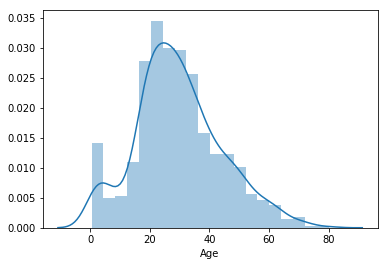

In [8]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [9]:
df['Age']=df['Age'].interpolate()

In [10]:
len(df['Cabin'].unique())

148

In [11]:
df=df.drop('Cabin', axis=1)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


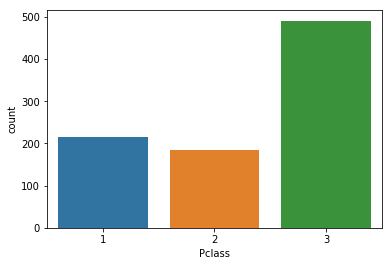

In [14]:
sns.countplot(x='Pclass',data=df)

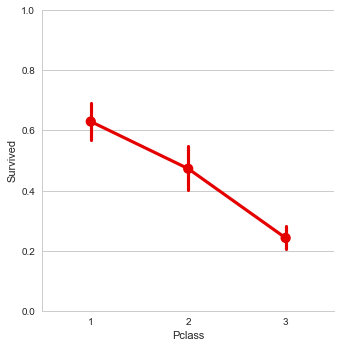

In [15]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

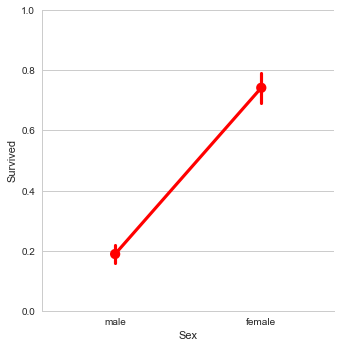

In [16]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df['is_child']=df['Age'].apply(lambda x: 1 if x <= 15 else 0)

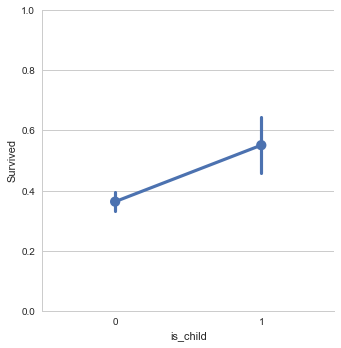

In [19]:
i=sns.PairGrid(data=df, x_vars=['is_child'],y_vars='Survived',size=5)
i.map(sns.pointplot)
i.set(ylim=(0,1))

In [20]:
df['family']=df['SibSp']+df['Parch']

In [21]:
df['is_alone']=df['family'].apply(lambda x: 1 if x == 0 else 0)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child,family,is_alone
0,0,3,male,22.0,1,0,7.2500,S,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [23]:
df['is_female']=df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df=df.drop('Sex',axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,1,0,7.2500,S,0,1,0,0
1,1,1,38.0,1,0,71.2833,C,0,1,0,1
2,1,3,26.0,0,0,7.9250,S,0,0,1,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,1
4,0,3,35.0,0,0,8.0500,S,0,0,1,0


In [24]:
df=pd.get_dummies(df,prefix=['is'])

In [25]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [26]:
x, y = df.drop(['Survived'], axis=1), df['Survived']

In [27]:
x

,Pclass,Age,SibSp,Parch,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,1,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,0,1
5,3,44.5,0,0,8.4583,0,0,1,0,0,1,0
6,1,54.0,0,0,51.8625,0,0,1,0,0,0,1
7,3,2.0,3,1,21.0750,1,4,0,0,0,0,1
8,3,27.0,0,2,11.1333,0,2,0,1,0,0,1
9,2,14.0,1,0,30.0708,1,1,0,1,1,0,0


In [28]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [29]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.80,test_size=0.20,stratify=y)

In [30]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
clf=LogisticRegression ()
clf.fit(train_x, train_y)
y_pred_log_reg=clf.predict(test_x)
acc_log_reg = round (clf.score(test_x, test_y)*100, 2)
print(str(acc_log_reg)+' percent')

82.68 percent


In [43]:
clf=LogisticRegression (penalty='l2')
clf.fit(train_x, train_y)
y_pred_log_reg=clf.predict(test_x)
acc_log_reg = round (clf.score(test_x, test_y)*100, 2)
print(str(acc_log_reg)+' percent')

82.68 percent


In [33]:
clf2=LinearSVC ()
clf2.fit(train_x, train_y)
y_pred_lin_SVC=clf2.predict(test_x)
acc_lin_SVC = round (clf2.score(test_x, test_y)*100, 2)
print(str(acc_lin_SVC)+' percent')

72.07 percent


In [34]:
clf3=KNeighborsClassifier ()
clf3.fit(train_x, train_y)
y_pred_K_Neigh=clf3.predict(test_x)
acc_K_Neigh = round (clf3.score(test_x, test_y)*100, 2)
print(str(acc_K_Neigh)+' percent')

70.95 percent


In [35]:
clf4=DecisionTreeClassifier ()
clf4.fit(train_x, train_y)
y_pred_Dec_Tree=clf4.predict(test_x)
acc_Dec_Tree = round (clf4.score(test_x, test_y)*100, 2)
print(str(acc_Dec_Tree)+' percent')

75.98 percent


In [36]:
clf5=RandomForestClassifier ()
clf5.fit(train_x, train_y)
y_pred_Ran_For=clf5.predict(test_x)
acc_Ran_For = round (clf5.score(test_x, test_y)*100, 2)
print(str(acc_Ran_For)+' percent')

77.09 percent


In [41]:
clf6=GaussianNB ()
clf6.fit(train_x, train_y)
y_pred_Gau_NB=clf6.predict(test_x)
acc_Gau_NB = round (clf6.score(test_x, test_y)*100, 2)
print(str(acc_Gau_NB)+' percent')

79.33 percent


In [42]:
clf10=RandomForestClassifier (n_estimators=1000)
clf10.fit(train_x, train_y)
y_pred_Ran_For=clf10.predict(test_x)
acc_Ran_For = round (clf10.score(test_x, test_y)*100, 2)
print(str(acc_Ran_For)+' percent')

78.77 percent


In [69]:
clf7=Perceptron ()
clf7.fit(train_x, train_y)
y_pred_Per_tron=clf7.predict(test_x)
acc_Per_tron = round (clf7.score(test_x, test_y)*100, 2)
print(str(acc_Per_tron)+' percent')

70.39 percent


/Users/shubhangijain/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [60]:
clf=RandomForestClassifier(n_estimators=500)
clf.fit(train_x, train_y)
y_pred_Ran_For=clf.predict(test_x)
acc_Ran_For = round (clf.score(test_x, test_y)*100, 2)
print(str(acc_Ran_For)+' percent')


78.77 percent


In [59]:
clf8=SGDClassifier ()
clf8.fit(train_x, train_y)
y_pred_SGD_class=clf8.predict(test_x)
acc_SGD_class = round (clf8.score(test_x, test_y)*100, 2)
print(str(acc_SGD_class)+' percent')

61.45 percent


/Users/shubhangijain/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [61]:
clf9=GradientBoostingClassifier (learning_rate=0.2)
clf9.fit(train_x, train_y)
y_pred_Grad_class=clf9.predict(test_x)
acc_Grad_class = round (clf9.score(test_x, test_y)*100, 2)
print(str(acc_Grad_class)+' percent')

79.89 percent


In [63]:
dftest=pd.read_csv('test.csv')

In [64]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
x_testset=dftest
x_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [67]:
dftest['Fare']=dftest['Fare'].fillna(df['Fare'].mean())

In [ ]:
#clf=LogisticRegression ()
#clf.fit(train_x, train_y)
#y_pred_log_reg=clf.predict(x_testset)
#print (acc_log_reg)

In [ ]:
#for submitting the homework
test=pd.read_csv('test.csv')
predict= pd.DataFrame({
    "PassengerId":Test["PassengerId"],
    "Survived":y_pred_random_forest
})
predict.to_csv('predictions',index = False)

In [ ]:
def sma_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(test_X, test_y))
    return classifier

In [ ]:
here_we_go = sma_first_classifier(LogisticRegression)



In [ ]:
clf = LogisticRegression()
clf.fit(train_X, train_y)
y_pred_log_reg = clf.predict(test_X)
acc_log_reg = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_random_forest = clf.predict(test_X)
acc_random_forest = round(clf.score(test_X, test_y) * 100, 2)
print (acc_random_forest)

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)